# Part 1

In [1]:
import numpy as np
from shapely import Polygon, buffer

In [2]:
with open("inputs/day18.txt") as fn:
    input = fn.read()

In [3]:
dirs = {'R':(0,1), 'L': (0,-1), 'U': (-1,0), 'D': (1,0)}
dirs = {k: np.array(v) for k, v in dirs.items()}

def dir_iter(d, n):
    for i in range(1,n+1):
        match d:
            case 'R':
                yield (0, i)
            case 'L':
                yield (0,-i)
            case 'U':
                yield (-i,0)
            case 'D':
                yield (i,0)

In [5]:
def get_corners(input):
    lines = [(dir, int(n), col) for dir, n, col in (l.split(" ") for l in input.splitlines())]

    coord = np.array((0,0))
    corners = [coord]

    for line in lines:
        delta = np.array(dirs[line[0]]) * line[1]
        coord += delta
        corners.append(coord.copy())

    return corners

In [6]:
corners = get_corners(input)

48652.0


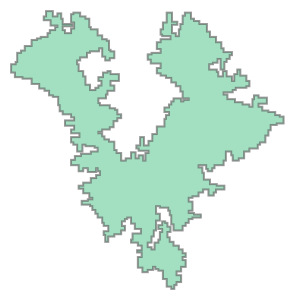

In [7]:
polygon = buffer(Polygon(corners), 0.5, join_style='mitre')
print(polygon.area)
polygon

# Part 2

45757884535661.0


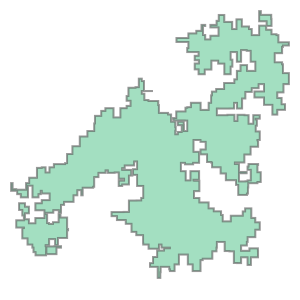

In [8]:
dirs = {0:(0,1), 2: (0,-1), 3: (-1,0), 1: (1,0)}
dirs = {k: np.array(v) for k, v in dirs.items()}

def get_corners(input):
    lines = [(dir, hex_str) for dir, n, hex_str in (l.split(" ") for l in input.splitlines())]

    coord = np.array((0,0))
    corners = [coord]

    for line in lines:
        hex, dir = line[1][2:7], line[1][7]

        delta = np.array(dirs[int(dir)]) * int(hex, 16)
        coord += delta
        corners.append(coord.copy())

    return corners

corners = get_corners(input)
polygon = buffer(Polygon(corners), 0.5, join_style='mitre')
print(polygon.area)
polygon